In [20]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
a = torch.randn((64, 60)) 
W1 = torch.randn((60, 300))
hpreact = a @ W1
hmean = hpreact.mean(0, keepdim=True)
hstd = hpreact.std(0, keepdim=True)
hnorm = (hpreact - hmean) / hstd
h2 = torch.tanh(hnorm)
h1 = torch.tanh(hpreact)
h1.shape

torch.Size([64, 300])

tensor([-0.1559]) tensor([1.0255])
0.2119520604610443 8.386690139770508
0.028720499947667122 1.051923155784607


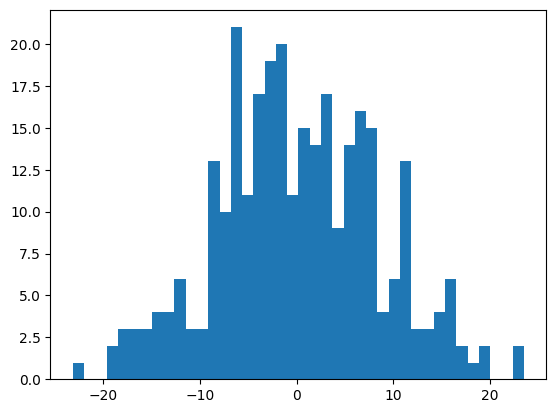

In [46]:
plt.hist(hpreact[0, :], bins = 40)
print(a[0, :].mean(0, keepdim=True), a[0, :].std(0, keepdim=True))
print(hpreact[0, :].mean(0, keepdim=True).item(), hpreact[0, :].std(0, keepdim=True).item())
print(hnorm[0, :].mean(0, keepdim=True).item(), hnorm[0, :].std(0, keepdim=True).item())

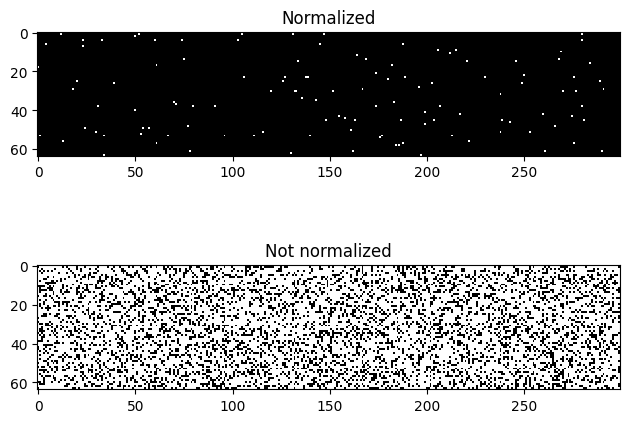

In [48]:
plot1 = plt.subplot2grid((2, 1),(1, 0), rowspan=3) # not batch normalized
plot2 = plt.subplot2grid((10, 1),(1, 0), rowspan=4, colspan= 4) # batch normalized

plot1.imshow(h1.abs() > 0.99, cmap='grey', interpolation='nearest')
plot1.set_title('Not normalized')
plot2.imshow(h2.abs() > 0.99, cmap='grey', interpolation='nearest')
plot2.set_title('Normalized')

# Not using batch normalization saturates n=most of the neurons in a tanh layer and bloocks gradients to pass through 


plt.tight_layout()
plt.show()



In [49]:
print((torch.tanh(a) > .99).sum()/ a.shape[0])

tensor(0.2812)


(array([[4., 3., 2., ..., 3., 5., 5.],
        [3., 7., 3., ..., 4., 6., 2.],
        [6., 6., 4., ..., 3., 1., 6.],
        ...,
        [3., 1., 2., ..., 8., 4., 1.],
        [3., 4., 1., ..., 0., 7., 4.],
        [5., 3., 4., ..., 2., 3., 5.]]),
 array([-9.99632001e-01, -8.99703860e-01, -7.99775720e-01, -6.99847579e-01,
        -5.99919438e-01, -4.99991268e-01, -4.00063127e-01, -3.00134987e-01,
        -2.00206831e-01, -1.00278683e-01, -3.50534916e-04,  9.95776132e-02,
         1.99505761e-01,  2.99433917e-01,  3.99362057e-01,  4.99290198e-01,
         5.99218369e-01,  6.99146509e-01,  7.99074650e-01,  8.99002790e-01,
         9.98930931e-01]),
 <a list of 60 BarContainer objects>)

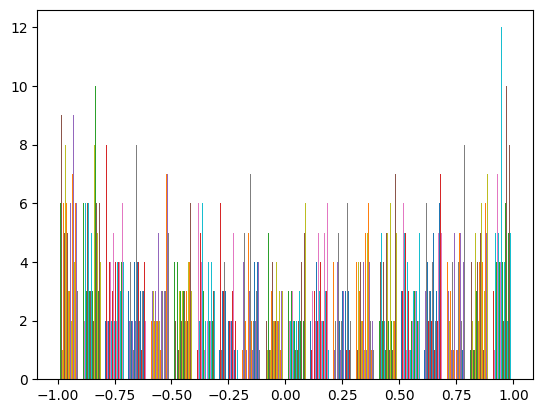

In [50]:
plt.hist(torch.tanh(a), bins = 20)

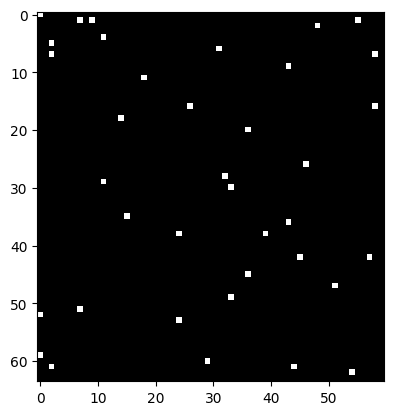

In [51]:
plt.imshow(a.abs() > 2.6,  cmap='grey', interpolation='nearest')

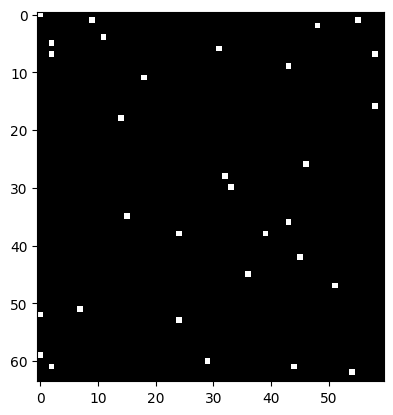

In [52]:
plt.imshow(torch.tanh(a).abs() > .99,  cmap='grey', interpolation='nearest')

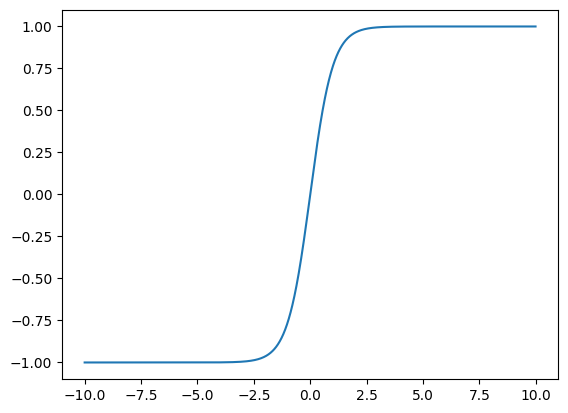

In [53]:
x = torch.arange(-10, 10, step = 0.01)
y = torch.tanh(x)
plt.plot(x, y)